# Loading Drug-Target Interaction Datasets

This notebook covers:
- Loading the Davis, KIBA, BindingDB, Metz datasets
- Merging them into a single dataframe
- Filtering based on molecular properties
- Visualizing distributions, overlaps, and statistics
- Saving the merged dataset as a csv file

Unique drug-target interaction pairs: 464.583
- Unique drugs: 162.880
- Unique targets: 2.705
- Ratio observed: 0.105%

In [1]:
import os

# Set the working directory to the root of the project
os.chdir("/home/robsyc/Desktop/thesis/MB-VAE-DTI")

In [2]:
# Import the necessary functions from the loading module
from mb_vae_dti.loading import (
    load_or_create_merged_dataset,
    get_dataset_stats,
    plot_interaction_distribution,
    plot_dataset_statistics,
    plot_dataset_overlap,
    plot_promiscuity_analysis
)

03:01:28 - INFO - Old pandas version detected. Patching DataFrame.map to DataFrame.applymap


## Load, merge and filter the datasets


In [3]:
# Load the merged dataset & apply filters
df = load_or_create_merged_dataset(
    dataset_names=["DAVIS", "KIBA", "BindingDB_Kd", "BindingDB_Ki", "Metz"], 
    force_reload=False,
    apply_filters=True,
    verbose=True
)

Loading existing merged dataset from data/processed/merged_BindingDB_Kd_BindingDB_Ki_DAVIS_KIBA_Metz_filtered.csv


In [4]:
# Get statistics of the merged dataset
get_dataset_stats(df)

{'n_interactions': 464583,
 'n_unique_drugs': 162880,
 'n_unique_targets': 2705,
 'avg_drug_smiles_length': 52.27712378627716,
 'avg_target_aa_length': 541.3403891231492,
 'Y_pKd_mean': 5.687022318217582,
 'Y_pKd_std': 1.2010130718830354,
 'Y_pKd_min': 1.999999995657055,
 'Y_pKd_max': 10.0,
 'Y_KIBA_mean': 11.70627341827158,
 'Y_KIBA_std': 0.82103579237372,
 'Y_KIBA_min': 0.0,
 'Y_KIBA_max': 17.196910013,
 'Y_pKi_mean': 6.705946891213439,
 'Y_pKi_std': 1.4732765092023137,
 'Y_pKi_min': 1.999999995657055,
 'Y_pKi_max': 10.1,
 'in_DAVIS_count': 23188,
 'in_DAVIS_percentage': 4.991142594541772,
 'in_KIBA_count': 105361,
 'in_KIBA_percentage': 22.678617168514563,
 'in_BindingDB_Kd_count': 37010,
 'in_BindingDB_Kd_percentage': 7.966283742625106,
 'in_BindingDB_Ki_count': 283081,
 'in_BindingDB_Ki_percentage': 60.93227690208208,
 'in_Metz_count': 30689,
 'in_Metz_percentage': 6.6057087753964305}

## Visualize the merged dataset

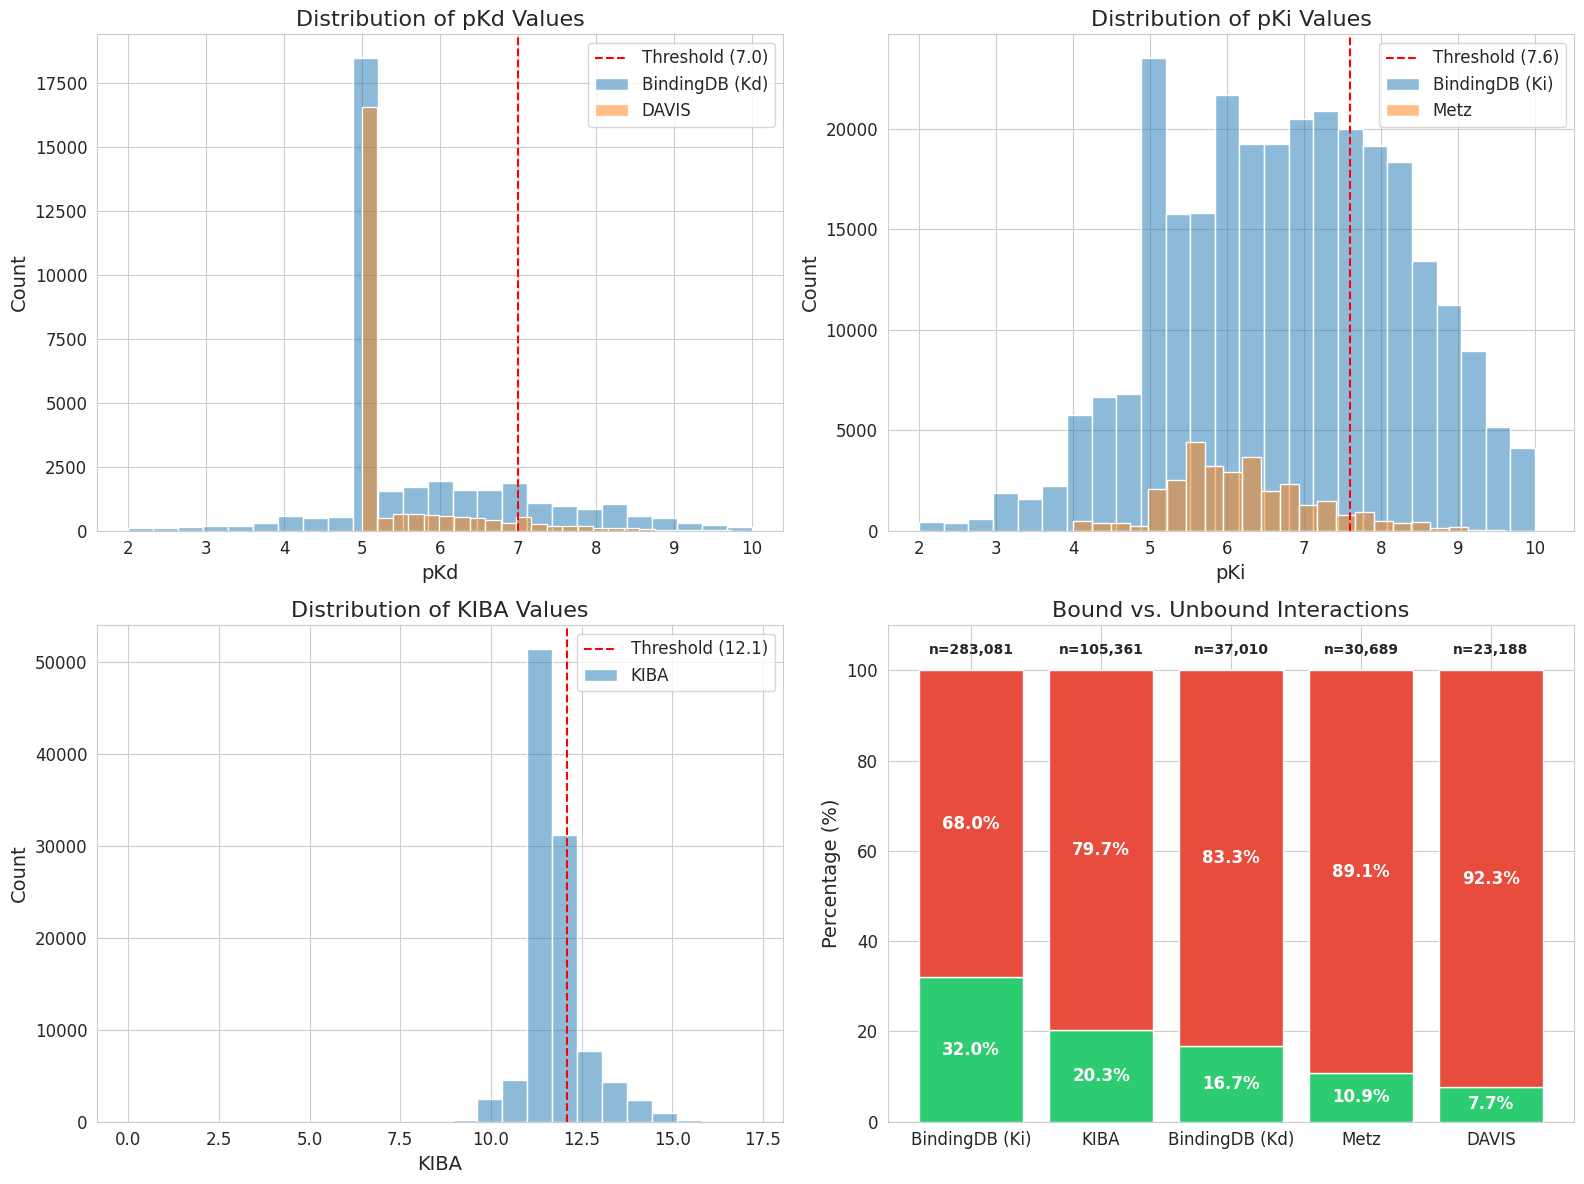

'data/images/interaction_distribution.png'

In [5]:
df_Davis = df[df['in_DAVIS'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
df_BDBKd = df[df['in_BindingDB_Kd'] == True].drop(columns = ['Y_pKi', 'Y_KIBA'])
df_BDBKi = df[df['in_BindingDB_Ki'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
df_Metz = df[df['in_Metz'] == True].drop(columns = ['Y_pKd', 'Y_KIBA'])
df_KIBA = df[df['in_KIBA'] == True].drop(columns = ['Y_pKd', 'Y_pKi'])

plot_interaction_distribution(
    [df_BDBKd, df_Davis, df_BDBKi, df_Metz, df_KIBA],
    ["BindingDB (Kd)", "DAVIS", "BindingDB (Ki)", "Metz", "KIBA"],
    save_path="data/images/interaction_distribution.png"
)

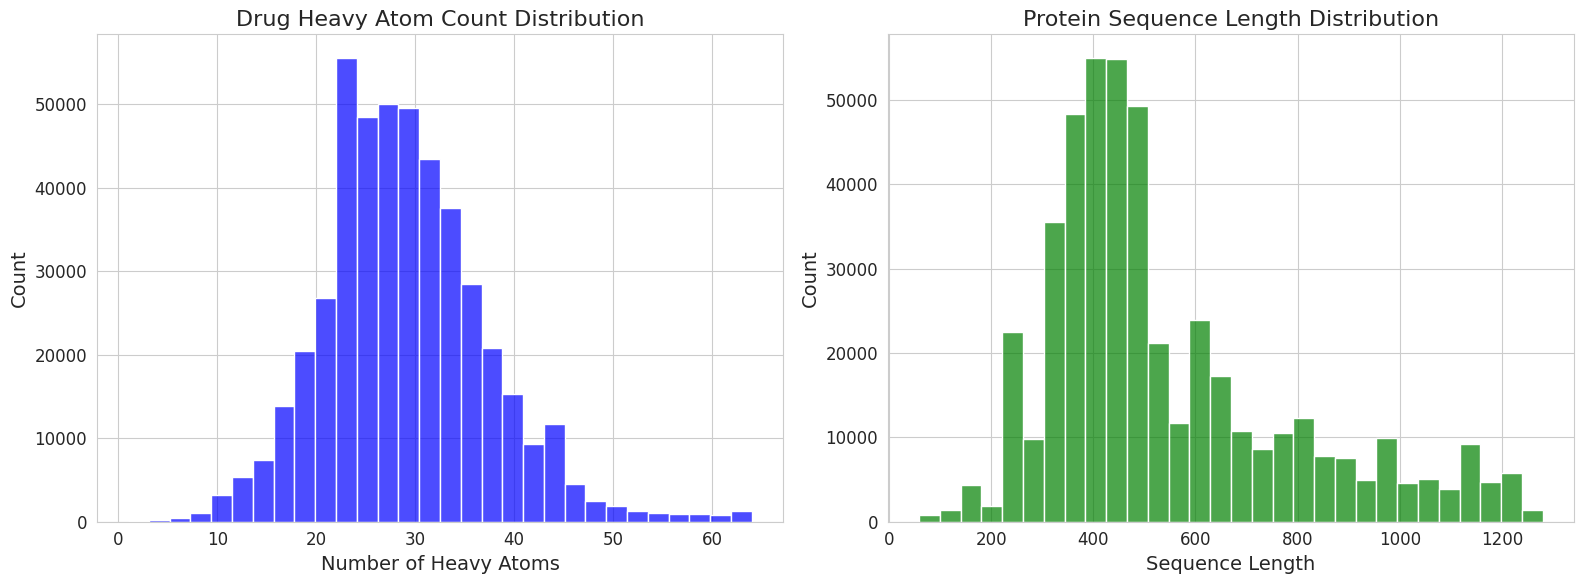

'data/images/dataset_statistics.png'

In [6]:
plot_dataset_statistics(df)

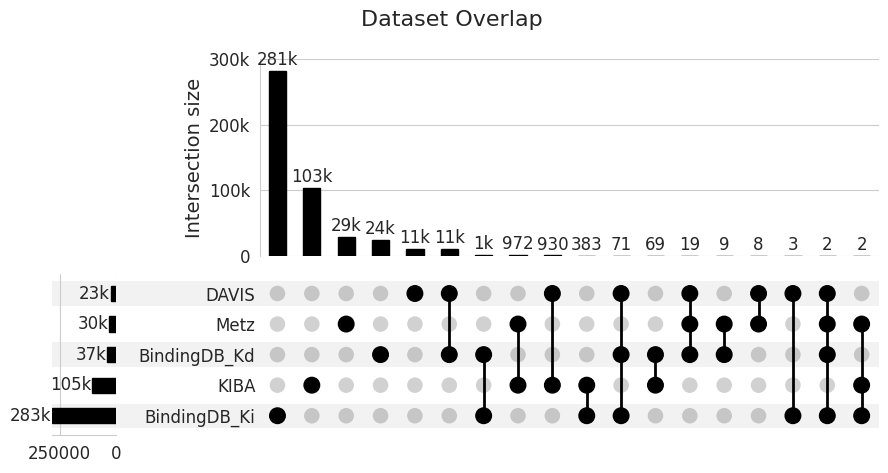

'data/images/dataset_overlap.png'

In [7]:
# This UpSet plot shows
# - the number of unique interactions per dataset
# - the overlap between datasets
plot_dataset_overlap(df)

Drug Interaction Statistics:
Drugs with 0 interactions: 0 (0.0%)
Drugs with 1 interaction: 90,165 (55.4%)
Mean interactions per drug: 2.9
Median interactions per drug: 1.0
Max interactions per drug: 386
Percentiles:
25th: 1, 50th: 1, 75th: 2
90th: 4, 95th: 5, 99th: 29

Target Interaction Statistics:
Targets with 0 interactions: 0 (0.0%)
Targets with 1 interaction: 362 (13.4%)
Mean interactions per target: 171.7
Median interactions per target: 17.0
Max interactions per target: 6,624
Percentiles:
25th: 3, 50th: 17, 75th: 108
90th: 535, 95th: 995, 99th: 1981



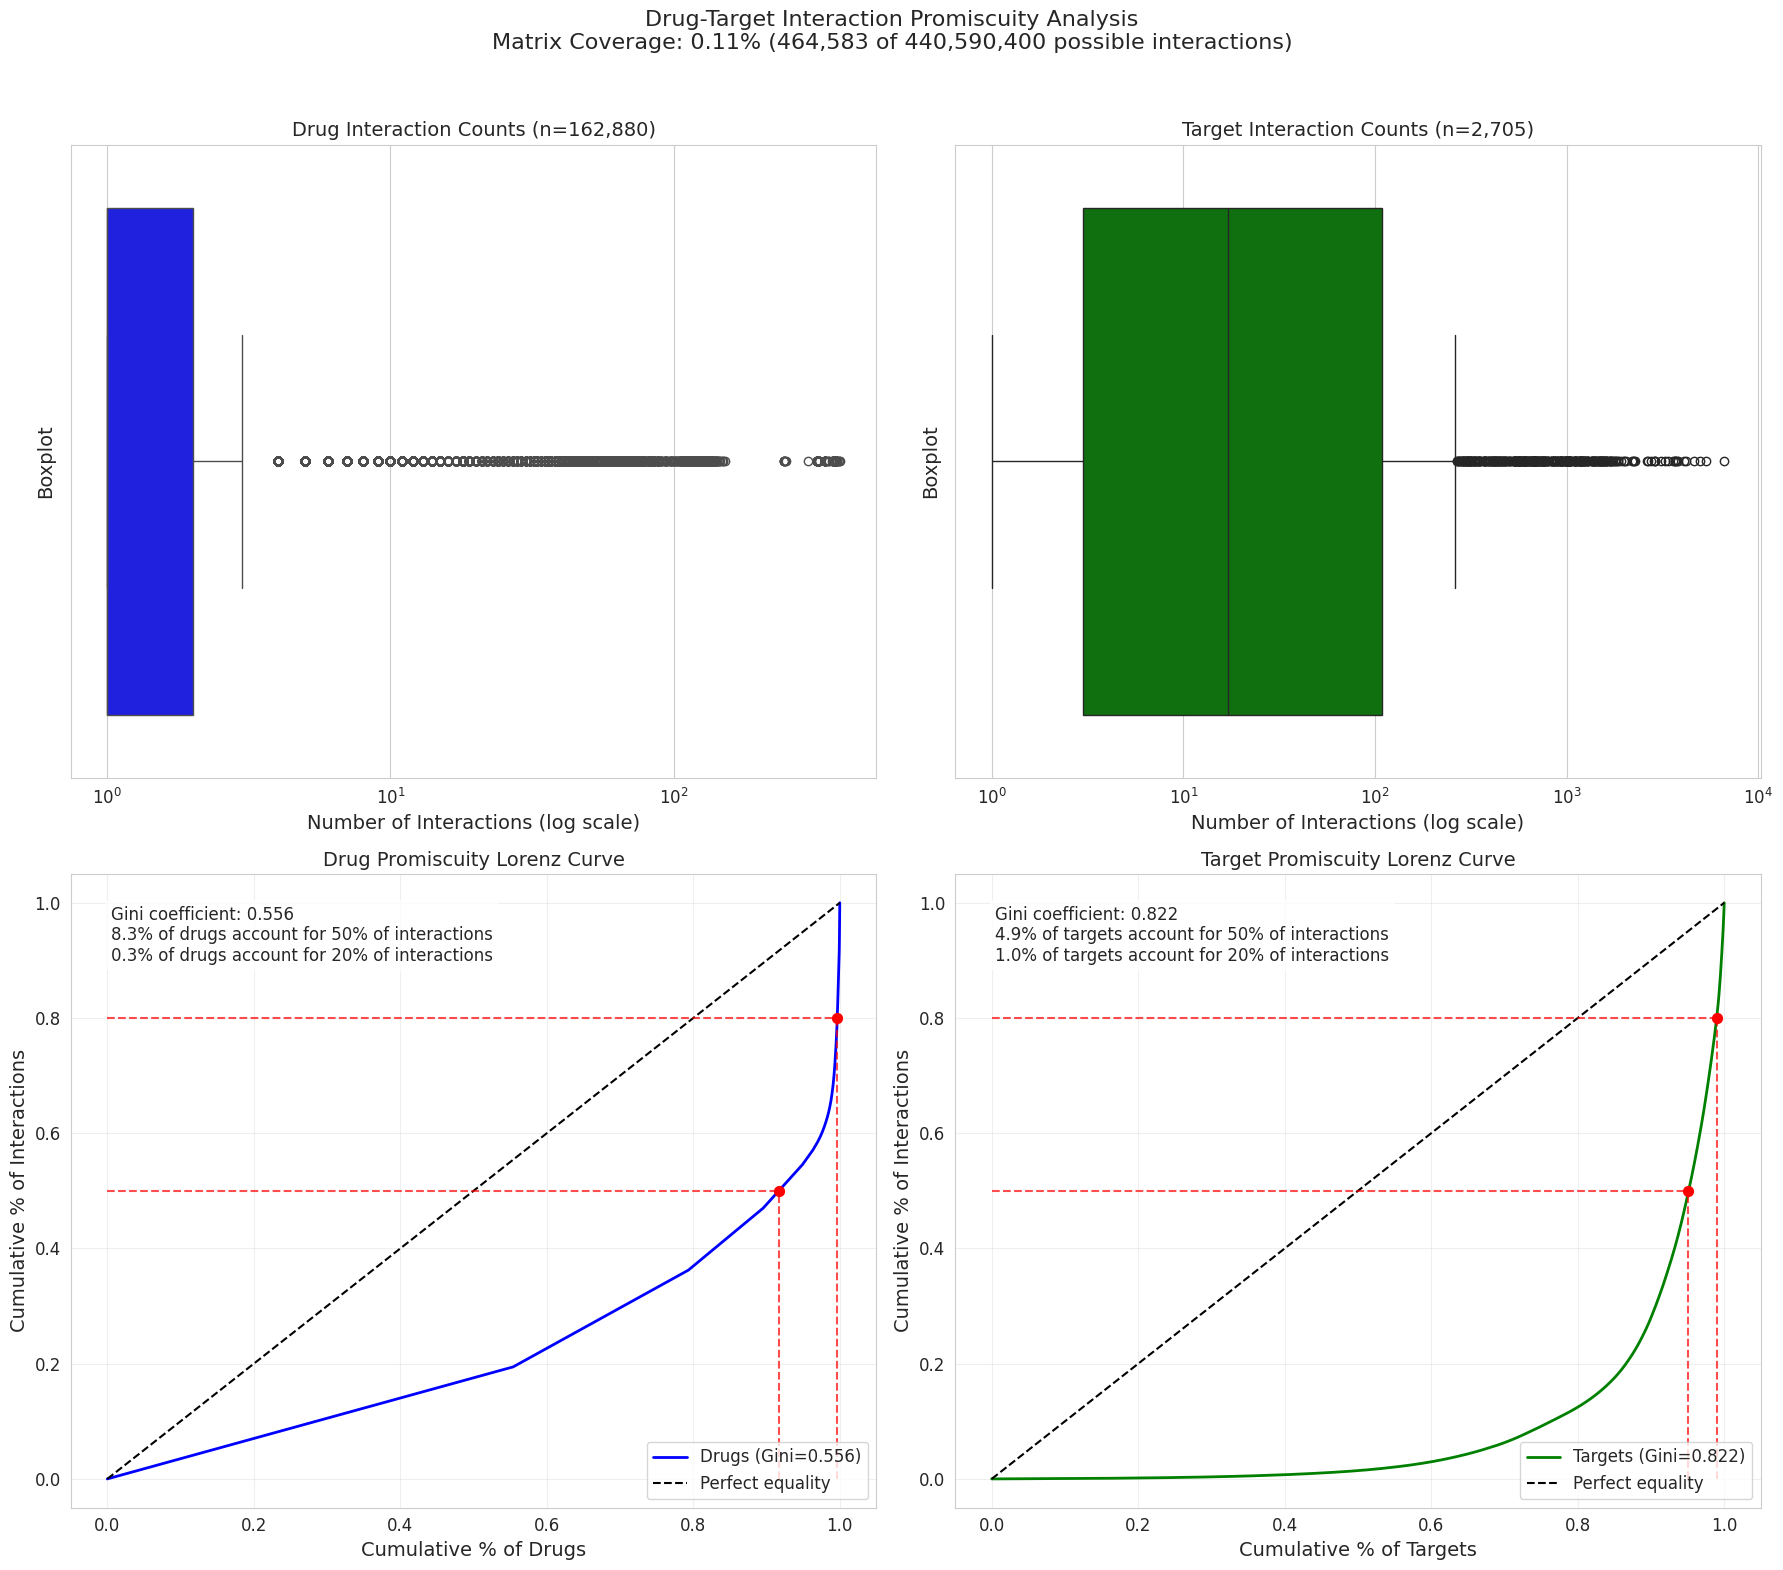

'data/images/promiscuity_analysis.png'

In [8]:
plot_promiscuity_analysis(df)